# Study impact in CLUE_clusters.root

In [1]:
import pandas as pd
import uproot
import sys
sys.path.append("..")
from hists.dataframe import *
import matplotlib.pyplot as plt

In [2]:
input_file = '/data_cms_upgrade/cuisset/testbeam18/clue3d/v15/single-file/data/CLUE_clusters.root'

In [3]:
for array_i in uproot.iterate(input_file + ":clusters", step_size="10MB", library="ak"):
    array = array_i
    break
comp = DataframeComputations(array)

In [4]:
pd.set_option('display.min_rows', 100)

In [5]:
df = pd.merge(comp.impact.reset_index(), comp.rechits[["rechits_z", "rechits_layer"]].groupby("rechits_layer").first(),
how="right",
left_on="layer",
right_on="rechits_layer").set_index(["event", "layer"]).sort_index().rename(columns={"rechits_z":"impactZ"})

In [6]:
df.loc[1]

,impactX,impactY,impactZ
layer,,,
1,-0.896987,5.187577,13.877500
2,-1.001078,5.176177,14.767500
3,-1.077065,5.199332,16.782499
4,-1.055886,5.154562,17.672501
5,-0.912743,5.200796,19.687500
6,-0.982503,5.225317,20.577499
7,-1.150262,5.168538,22.692499
8,-1.156072,5.166158,23.582500
9,-1.119120,5.095309,25.697500


In [7]:
%matplotlib widget

In [8]:
def plotEventNb(eventNb):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    event_df = df.loc[eventNb]
    ax.view_init(vertical_axis="y")
    ax.plot(event_df["impactX"], event_df["impactY"], event_df["impactZ"])
    ax.set_xlabel("impactX (cm)")
    ax.set_ylabel("impactY (cm)")
    ax.set_zlabel("layer z position (cm)")

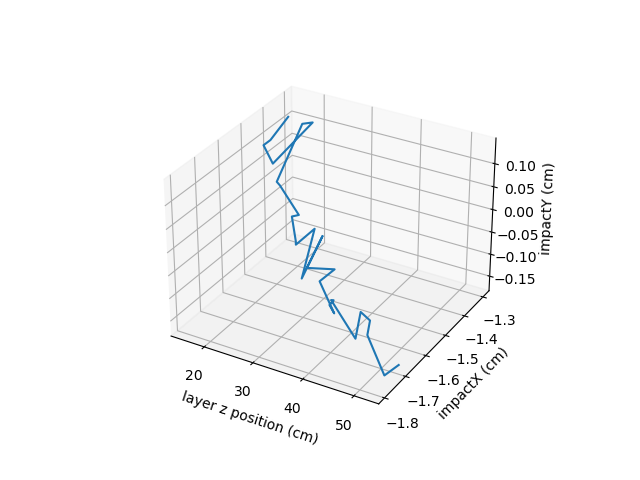

In [9]:
plotEventNb(0)


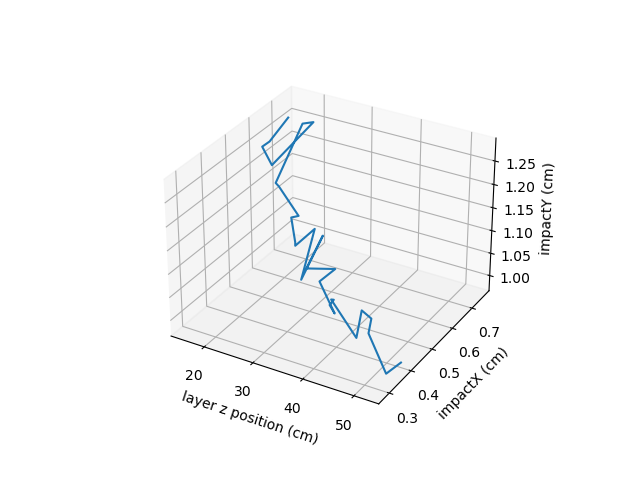

In [10]:
plotEventNb(500)

In [12]:
comp.rechits[["rechits_z", "rechits_layer"]].groupby("rechits_layer").first().to_dict()

{'rechits_z': {1: 13.8774995803833,
  2: 14.767499923706055,
  3: 16.782499313354492,
  4: 17.672500610351562,
  5: 19.6875,
  6: 20.577499389648438,
  7: 22.6924991607666,
  8: 23.582500457763672,
  9: 25.697500228881836,
  10: 26.587499618530273,
  11: 28.702499389648438,
  12: 29.592500686645508,
  13: 31.50749969482422,
  14: 32.397499084472656,
  15: 34.3125,
  16: 35.20249938964844,
  17: 37.11750030517578,
  18: 38.00749969482422,
  19: 39.92250061035156,
  20: 40.8125,
  21: 42.907501220703125,
  22: 44.037498474121094,
  23: 46.412498474121094,
  24: 47.54249954223633,
  25: 49.68199920654297,
  26: 50.6879997253418,
  27: 52.881500244140625,
  28: 53.903499603271484}}